In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
import joblib

# Definir la ruta de guardado
save_path = "/Users/chants/Desktop/Pset2_cucalon/models/"
os.makedirs(save_path, exist_ok=True)  # Crea la carpeta si no existe

# Cargar el dataset con las features escaladas
file_path = "/Users/chants/Desktop/Pset2_cucalon/data/processed/Airbnb_Featured_Scaled.csv"
df = pd.read_csv(file_path)

# Separar variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=["log_price"])
y = df["log_price"]

# División en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Datos divididos: {X_train.shape[0]} train, {X_test.shape[0]} test")

# Regresión Lineal con Ecuación Normal (Implementación Propia)
theta_normal = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Regresión Lineal con Scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("✅ Regresión Lineal con Ecuación Normal entrenada")

# Regresión Lineal con SVD (Implementación Propia)
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
theta_svd = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train

print("✅ Regresión Lineal con SVD entrenada")

# Regresión Polinomial
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

print("✅ Regresión Polinomial entrenada")

# Regresión Lineal con Batch Gradient Descent (Implementación Propia)
learning_rate = 0.01
n_iterations = 1000
m = len(X_train)
theta_gd = np.random.randn(X_train.shape[1])

for iteration in range(n_iterations):
    gradients = (2/m) * X_train.T @ (X_train @ theta_gd - y_train)
    theta_gd -= learning_rate * gradients

print("✅ Regresión Lineal con Batch Gradient Descent entrenada")

# Regresión Lineal con Stochastic Gradient Descent
sgd_reg = SGDRegressor(max_iter=5000, tol=1e-3, penalty=None, eta0=0.01)
sgd_reg.fit(X_train, y_train)

print("✅ Regresión Lineal con Stochastic Gradient Descent entrenada")

# Lasso Regression
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

print("✅ Lasso Regression entrenada")

# Ridge Regression
ridge_reg = Ridge(alpha=0.001)
ridge_reg.fit(X_train, y_train)

print("✅ Ridge Regression entrenada")

# Guardar los modelos entrenados en la carpeta definida
joblib.dump(lin_reg, os.path.join(save_path, "lin_reg.pkl"))
joblib.dump(poly_reg, os.path.join(save_path, "poly_reg.pkl"))
joblib.dump(sgd_reg, os.path.join(save_path, "sgd_reg.pkl"))
joblib.dump(lasso_reg, os.path.join(save_path, "lasso_reg.pkl"))
joblib.dump(ridge_reg, os.path.join(save_path, "ridge_reg.pkl"))
joblib.dump(poly, os.path.join(save_path, "poly_features.pkl"))
joblib.dump(theta_normal, os.path.join(save_path, "theta_normal.pkl"))
joblib.dump(theta_svd, os.path.join(save_path, "theta_svd.pkl"))
joblib.dump(theta_gd, os.path.join(save_path, "theta_gd.pkl"))

print(f"✅ Modelos guardados correctamente")



✅ Datos divididos: 59288 train, 14823 test
✅ Regresión Lineal con Ecuación Normal entrenada
✅ Regresión Lineal con SVD entrenada
✅ Regresión Polinomial entrenada
✅ Regresión Lineal con Batch Gradient Descent entrenada
✅ Regresión Lineal con Stochastic Gradient Descent entrenada
✅ Lasso Regression entrenada
✅ Ridge Regression entrenada
✅ Modelos guardados correctamente en /Users/chants/Desktop/Pset2_cucalon/models/


In [ ]:
from sklearn.metrics import mean_squared_error

# Predecir en train y test
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Calcular errores en train y test (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

print(f"🔹 RMSE Train: {rmse_train:.4f}")
print(f"🔹 RMSE Test: {rmse_test:.4f}")



🔹 RMSE Train: 0.4502
🔹 RMSE Test: 0.4574


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

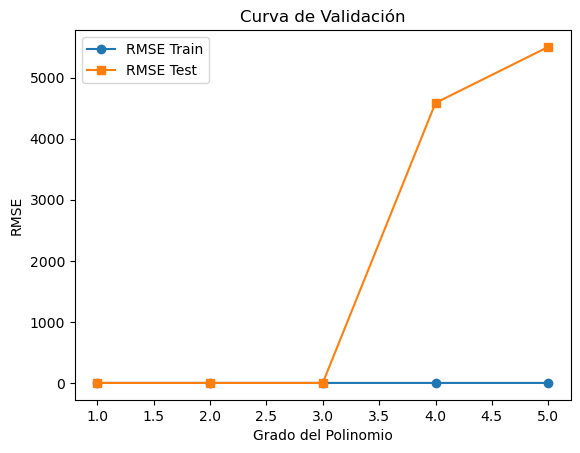

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_errors = []
test_errors = []
degrees = range(1, 6)  # Probamos polinomios de grado 1 a 5

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly_d = poly.fit_transform(X_train)
    X_test_poly_d = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly_d, y_train)

    y_train_pred = model.predict(X_train_poly_d)
    y_test_pred = model.predict(X_test_poly_d)

    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    train_errors.append(rmse_train)
    test_errors.append(rmse_test)

# 📈 Graficar los errores
plt.plot(degrees, train_errors, label="RMSE Train", marker="o")
plt.plot(degrees, test_errors, label="RMSE Test", marker="s")
plt.xlabel("Grado del Polinomio")
plt.ylabel("RMSE")
plt.title("Curva de Validación")
plt.legend()
plt.show()
